Accuracy: 1.0
682                          Malaria
3963                 Osteoarthristis
3126             Chronic cholestasis
4480                     Hepatitis B
3411                  Hypothyroidism
                    ...             
4426                   Drug Reaction
466                      hepatitis A
3092                  Varicose veins
3772                        Jaundice
860     Dimorphic hemmorhoids(piles)
Name: Disease, Length: 3444, dtype: object


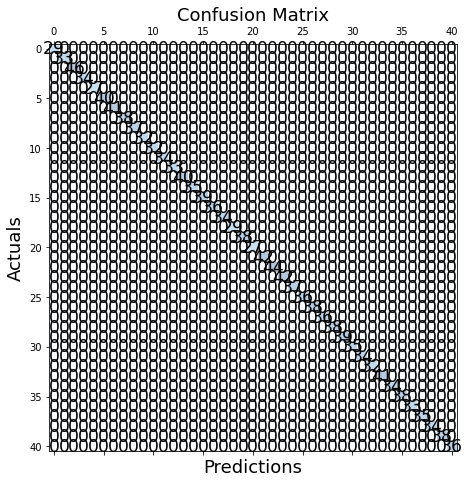

ValueError: The number of FixedLocator locations (41), usually from a call to set_ticks, does not match the number of ticklabels (4920).

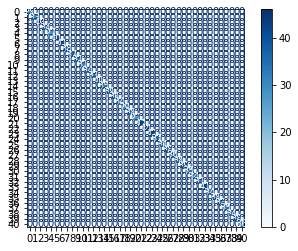

In [12]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import joblib

#
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
#

df=pd.read_csv('pre_processed.csv')
X=df.drop(['Disease'], axis=1)
y=df.iloc[:,-1]
class_names=df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

forest=RandomForestClassifier(n_estimators=30)
forest.fit(X_train,y_train)
pred=forest.predict(X_test)
joblib.dump(forest,"random_forest.joblib")
print("Accuracy:",metrics.accuracy_score(y_test, pred))

print(y_train)

# pipeline = make_pipeline(StandardScaler(),
# RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))
#
# Fit the Pipeline estimator
#
# pipeline.fit(X_train, y_train)

#
# Get the predictions
#
# y_pred = pipeline.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


